In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'E:\programming\dataset\Into_to_statstical_learning\Wage.csv')
data = data[['age','wage']]
print(data.shape)
data.head()

(3000, 2)


,age,wage
0,18,75.043154
1,24,70.476020
2,45,130.982177
3,43,154.685293
4,50,75.043154


In [3]:
# fitting a degree 4 ploynomial regression
poly = PolynomialFeatures(4)
X = poly.fit_transform(data['age'].to_frame())
y = data['wage']

model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
X_test = np.linspace(min(data['age']),max(data['age']),100)

X_test_poly = poly.transform(X_test.reshape(-1,1))
pred = model.predict(X_test_poly)

Text(0.5, 1.0, 'Polynomial Regression')

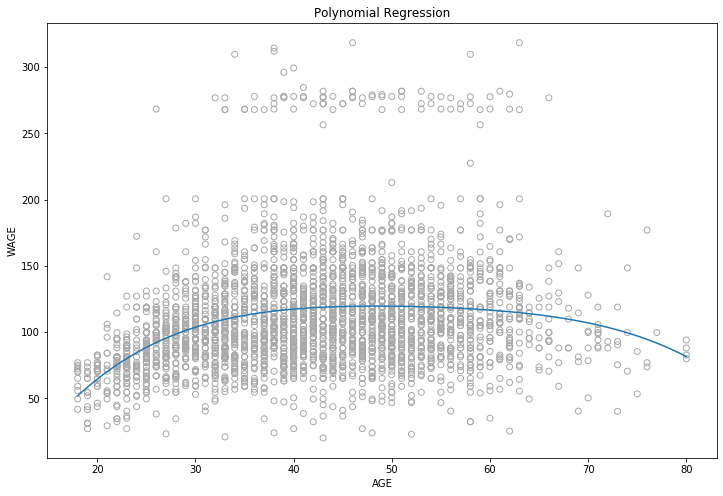

In [5]:
pred = model.predict(X_test_poly)
plt.figure(figsize = (12,8))
plt.scatter(data['age'],data['wage'],facecolors='none', edgecolors='darkgray')
plt.plot(X_test,pred)
plt.xlabel('AGE')
plt.ylabel('WAGE')
plt.title('Polynomial Regression')

In [6]:
from bootstrap import Bootstrap_ci

bootstrap = Bootstrap_ci()

In [7]:

li,ui = bootstrap.boot(pd.DataFrame(X),y,1000,X_test_poly,LinearRegression())

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 376.49it/s]


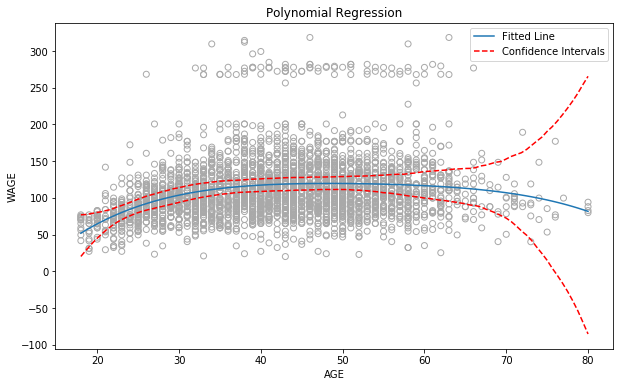

In [12]:
pred = model.predict(X_test_poly)
plt.figure(figsize = (10,6))
plt.scatter(data['age'],data['wage'],facecolors='none', edgecolors='darkgray')
plt.plot(X_test,pred,label = 'Fitted Line')
plt.plot(X_test,ui,linestyle = 'dashed',color = 'r',label = 'Confidence Intervals')
plt.plot(X_test,li,linestyle = 'dashed',color = 'r')
plt.xlabel('AGE')
plt.ylabel('WAGE')
plt.title('Polynomial Regression')
plt.legend()